In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Global_Superstore(CSV).csv')

In [ ]:

print(df.head())

   Row ID                  Order ID  Order Date   Ship Date     Ship Mode  \
0   40098  CA-2014-AB10015140-41954  11/11/2014  11/13/2014   First Class   
1   26341    IN-2014-JR162107-41675    2/5/2014    2/7/2014  Second Class   
2   25330    IN-2014-CR127307-41929  10/17/2014  10/18/2014   First Class   
3   13524   ES-2014-KM1637548-41667   1/28/2014   1/30/2014   First Class   
4   47221   SG-2014-RH9495111-41948   11/5/2014   11/6/2014      Same Day   

    Customer ID     Customer Name      Segment  Postal Code           City  \
0  AB-100151402     Aaron Bergman     Consumer      73120.0  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate          NaN     Wollongong   
2     CR-127307      Craig Reiter     Consumer          NaN       Brisbane   
3    KM-1637548  Katherine Murray  Home Office          NaN         Berlin   
4    RH-9495111       Rick Hansen     Consumer          NaN          Dakar   

   ...   Product ID    Category Sub-Category  \
0  ...  TEC-PH-5816 

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          1000 non-null   int64  
 1   Order ID        1000 non-null   object 
 2   Order Date      1000 non-null   object 
 3   Ship Date       1000 non-null   object 
 4   Ship Mode       1000 non-null   object 
 5   Customer ID     1000 non-null   object 
 6   Customer Name   1000 non-null   object 
 7   Segment         1000 non-null   object 
 8   Postal Code     194 non-null    float64
 9   City            1000 non-null   object 
 10  State           1000 non-null   object 
 11  Country         1000 non-null   object 
 12  Region          1000 non-null   object 
 13  Market          1000 non-null   object 
 14  Product ID      1000 non-null   object 
 15  Category        1000 non-null   object 
 16  Sub-Category    1000 non-null   object 
 17  Product Name    1000 non-null   ob

In [ ]:
print(df.isnull().sum())

Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Postal Code       806
City                0
State               0
Country             0
Region              0
Market              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
dtype: int64


In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [ ]:
sales_by_category_region = df.pivot_table(
    index='Category',
    columns='Region',
    values='Sales',
    aggfunc='sum',
    observed=True
)
print(sales_by_category_region)



Region           Central US  Eastern US  Southern US  Western US
Category                                                        
Furniture           2085.15     3258.53      1896.44     6081.09
Office Supplies    12231.04     7326.56      4275.50     4875.39
Technology          2871.75     1671.35      2188.81     5773.47


In [ ]:
profit_by_sub_category = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(10)
print("Top 10 Profitable Sub-Categories:")
print(profit_by_sub_category)



Top 10 Profitable Sub-Categories:
Sub-Category
Phones         75119.47
Copiers        52315.19
Appliances     48518.99
Bookcases      45483.14
Chairs         23245.88
Tables         13051.69
Machines        8992.06
Accessories     8641.96
Binders         7435.09
Storage         4490.04
Name: Profit, dtype: float64


In [ ]:
profit_margin_region_category = df.pivot_table(
    index='Region',
    columns='Category',
    values='Profit Margin',
    aggfunc='mean',
    observed=True
)
print(profit_margin_region_category)


Category     Furniture  Office Supplies  Technology
Region                                             
Central US  -30.798932         2.822028    7.042028
Eastern US    8.570773        24.520662   34.563778
Southern US  20.750359        11.804324   10.668001
Western US    1.713798        21.990150   13.731642


In [ ]:
quantity_by_category_month = df.pivot_table(
    index='Month',
    columns='Category',
    values='Quantity',
    aggfunc='mean',
    observed=True
)
print(quantity_by_category_month)


Category  Furniture  Office Supplies  Technology
Month                                           
1               NaN             22.0         7.0
2               NaN              6.0         NaN
3              19.0             39.0         4.0
4               5.0             40.0         NaN
5               9.0             21.0         7.0
6               8.0             28.0         3.0
7               4.0             23.0         7.0
8               NaN             18.0        12.0
9              18.0             67.0        14.0
10             22.0             24.0         5.0
11             34.0             77.0        21.0
12             11.0             99.0        27.0


In [ ]:
sales_proportion = (df.groupby('Category')['Sales'].sum() / df['Sales'].sum()) * 100
print("Proportion of Sales by Category:")
print(sales_proportion)


Proportion of Sales by Category:
Category
Furniture          24.426864
Office Supplies    52.642244
Technology         22.930891
Name: Sales, dtype: float64


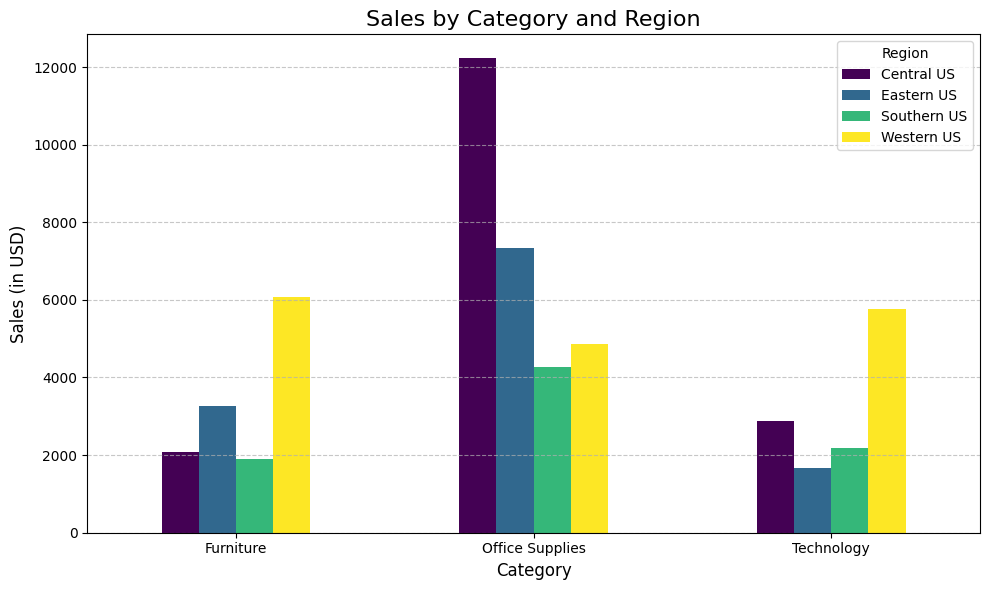

In [ ]:

sales_by_category_region.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Sales by Category and Region', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Sales (in USD)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Region', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

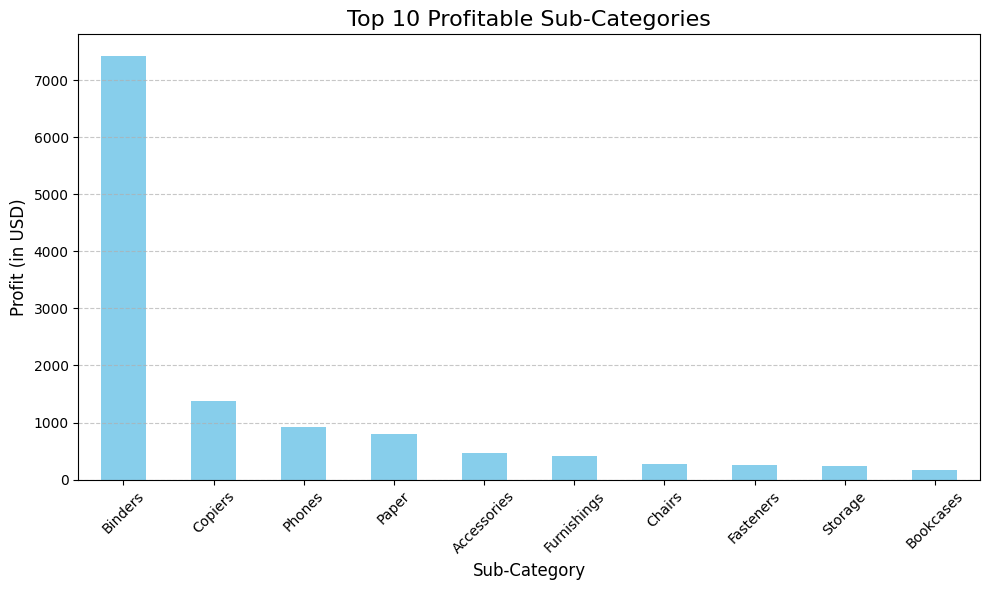

In [ ]:
profit_by_sub_category.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Top 10 Profitable Sub-Categories', fontsize=16)
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Profit (in USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



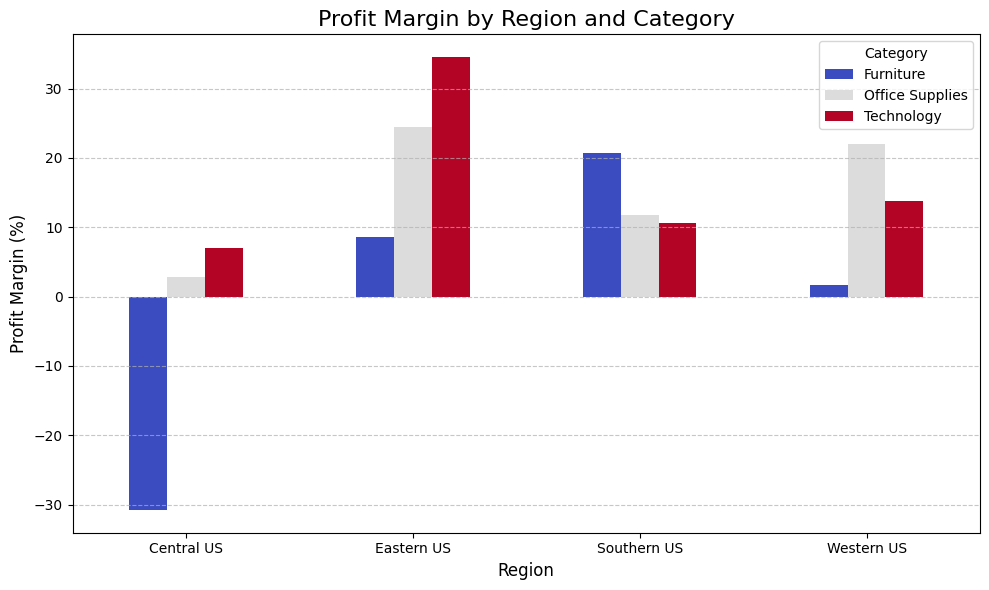

In [ ]:
profit_margin_region_category.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title('Profit Margin by Region and Category', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Profit Margin (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Category', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


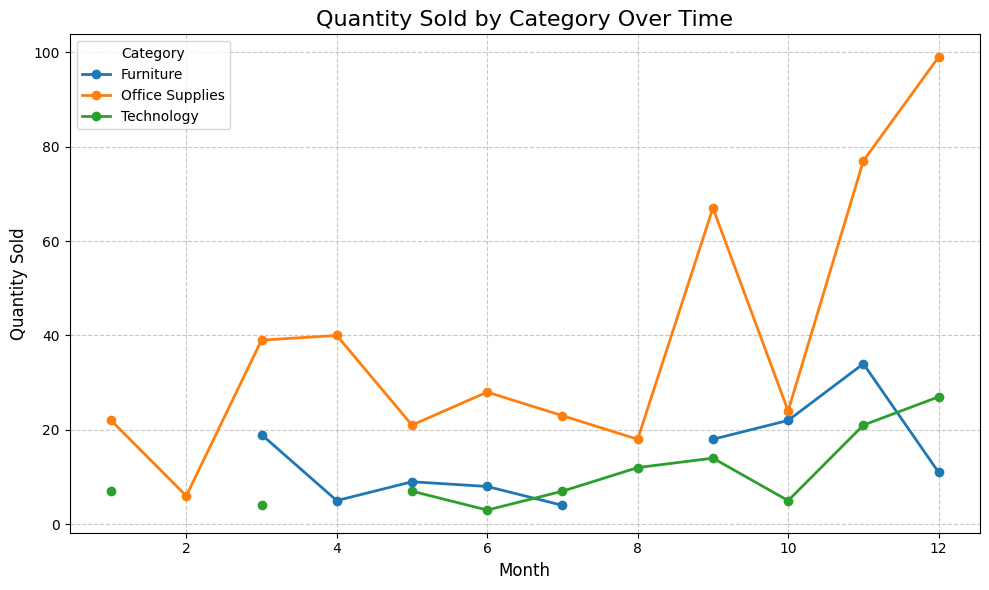

In [ ]:
quantity_by_category_month.plot(kind='line', figsize=(10, 6), marker='o', linewidth=2)
plt.title('Quantity Sold by Category Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.legend(title='Category', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


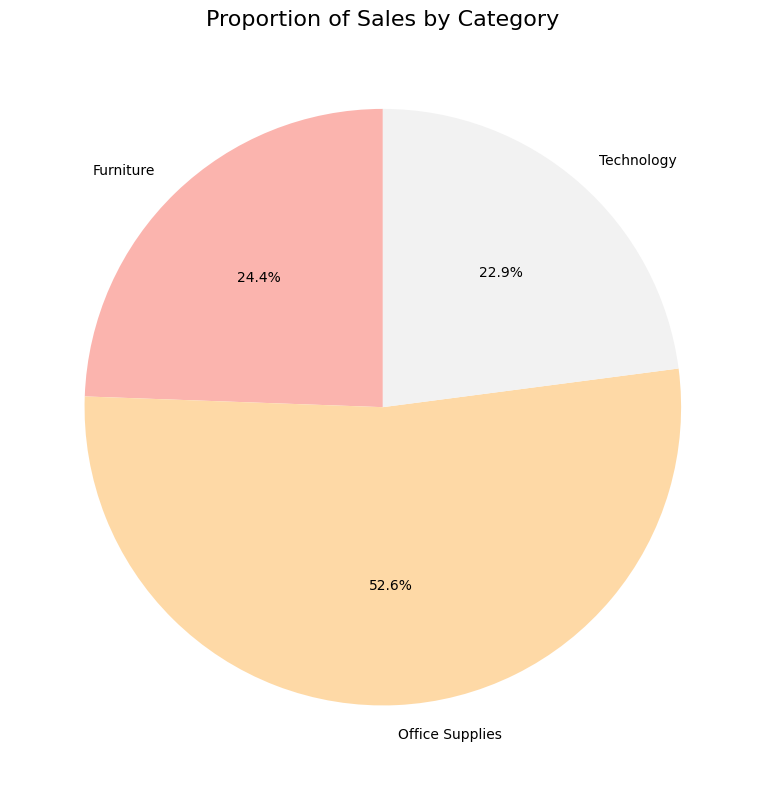

In [ ]:
sales_proportion.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Pastel1', figsize=(8, 8))
plt.title('Proportion of Sales by Category', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()


In [ ]:
total_sales_by_region = df.groupby('Region')['Sales'].sum()
highest_sales_region = total_sales_by_region.idxmax()
print(f"The region with the highest total sales is: {highest_sales_region}")


The region with the highest total sales is: Central US


In [ ]:
most_profitable_sub_category = profit_by_sub_category.idxmax()
print(f"The sub-category with the most profit is: {most_profitable_sub_category}")


The sub-category with the most profit is: Binders


In [ ]:
negative_profit = df[df['Profit'] < 0].groupby(['Region', 'Category'])['Profit'].sum()
if not negative_profit.empty:
    print("Regions or categories with negative profit:")
    print(negative_profit)
else:
    print("No regions or categories have negative profit.")


Regions or categories with negative profit:
Region       Category       
Central US   Furniture         -108.09
             Office Supplies   -143.61
             Technology        -270.84
Eastern US   Furniture         -198.09
             Office Supplies   -464.63
Southern US  Furniture          -35.36
             Office Supplies   -407.37
             Technology         -27.83
Western US   Furniture         -574.05
             Office Supplies   -105.34
             Technology         -18.55
Name: Profit, dtype: float64


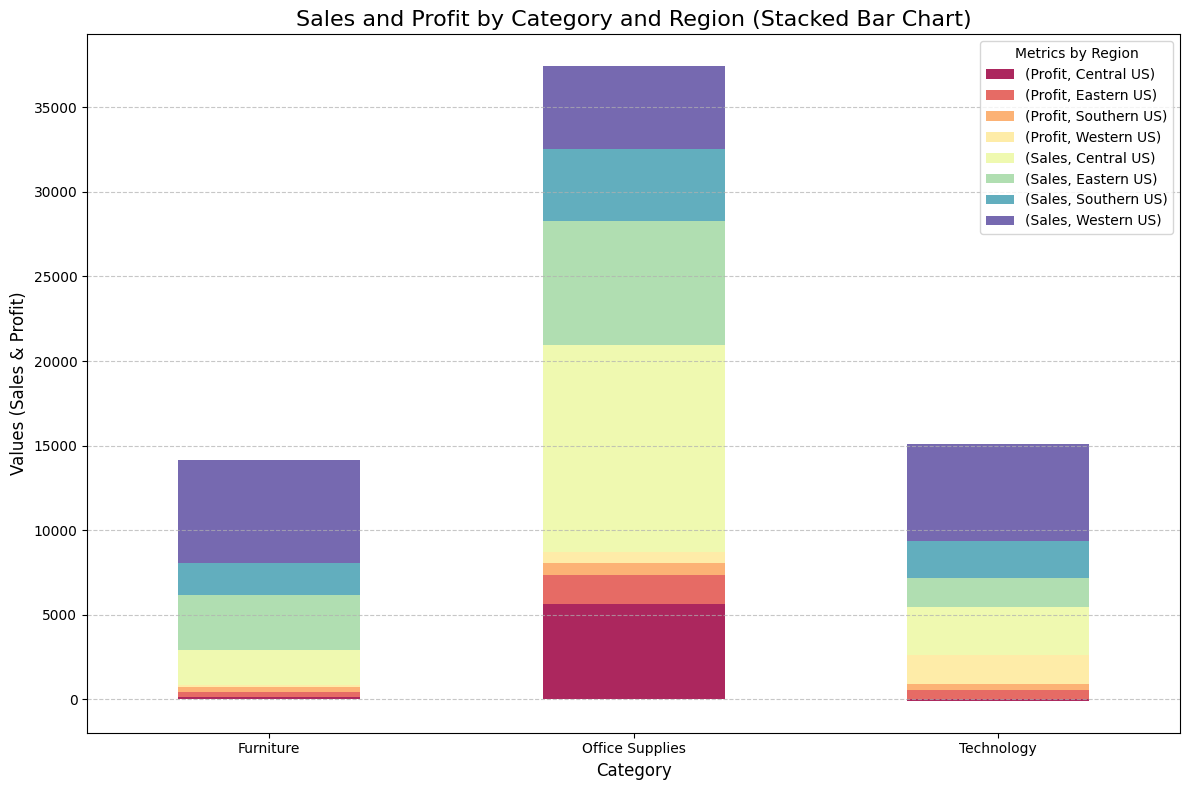

In [ ]:

sales_profit_category_region = df.pivot_table(
    index='Category',
    columns='Region',
    values=['Sales', 'Profit'],
    aggfunc='sum',
    margins=False
)


sales_profit_category_region.plot(
    kind='bar',
    figsize=(12, 8),
    stacked=True,
    colormap='Spectral',
    alpha=0.85
)
plt.title('Sales and Profit by Category and Region (Stacked Bar Chart)', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Values (Sales & Profit)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Metrics by Region', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()